In [1]:
import h5py
import numpy as np
import pandas as pd
import anndata
import scipy.sparse as sp
import scanpy as sc
import random
import scipy.sparse
from scipy.stats import ks_2samp
from collections import defaultdict
from matplotlib.patches import Wedge
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools

In [16]:
print('load COVID Italy dataset')
COVID_I = sc.read_h5ad('/home/yike/phd/dengue/data/dataset_from_google/COVID PBMC Italy/adata_filter.h5ad')

load COVID Italy dataset


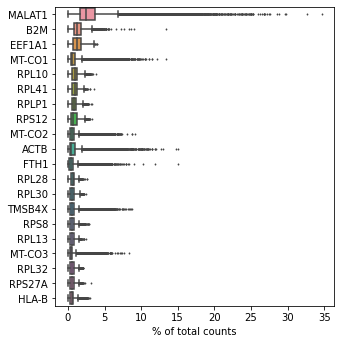

In [17]:
sc.pl.highest_expr_genes(COVID_I, n_top=20, )

In [18]:
sc.pp.filter_cells(COVID_I, min_genes=200)
sc.pp.filter_genes(COVID_I, min_cells=3)

In [19]:
COVID_I.var['mt'] = COVID_I.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(COVID_I, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

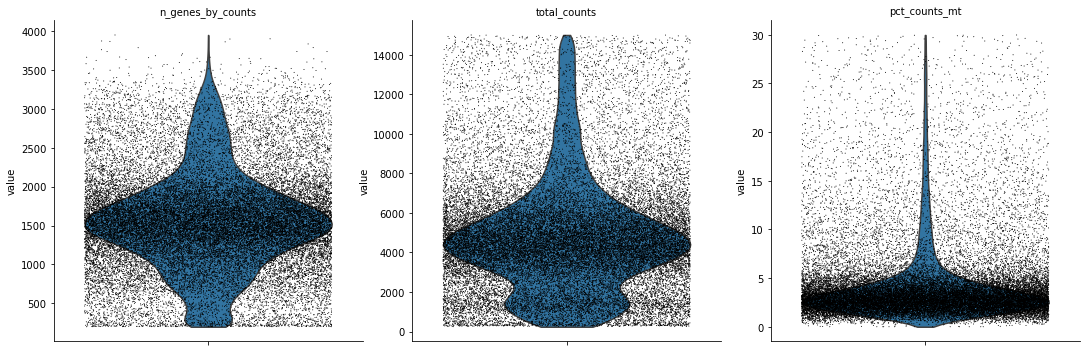

In [20]:
sc.pl.violin(COVID_I, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

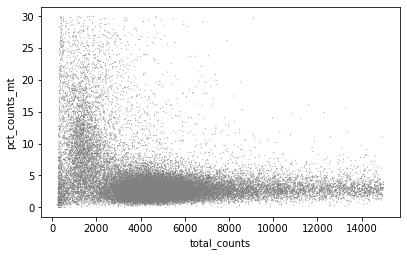

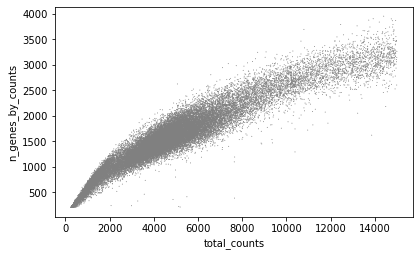

In [21]:
sc.pl.scatter(COVID_I, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(COVID_I, x='total_counts', y='n_genes_by_counts')

In [23]:
COVID_I = COVID_I[COVID_I.obs.n_genes_by_counts < 3500, :]
COVID_I = COVID_I[COVID_I.obs.pct_counts_mt < 5, :]

In [24]:
sc.pp.normalize_total(COVID_I, target_sum=1e6)
sc.pp.log1p(COVID_I)

/home/yike/.local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [25]:
sc.pp.highly_variable_genes(COVID_I, min_mean=0.0125, max_mean=3, min_disp=0.5)

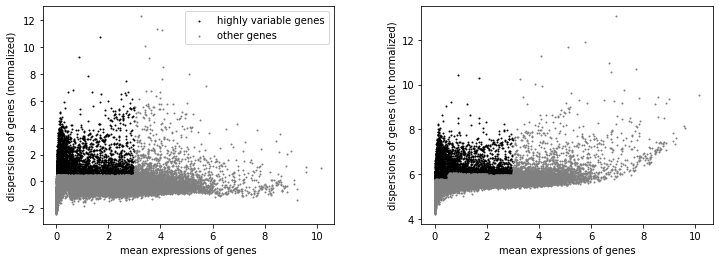

In [26]:
sc.pl.highly_variable_genes(COVID_I)

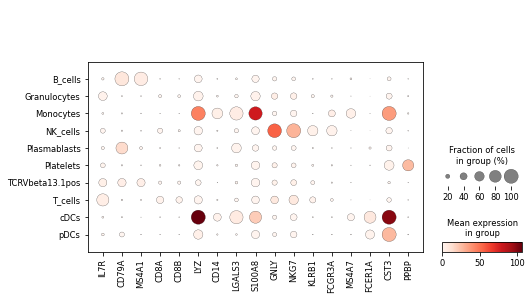

In [28]:

marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

sc.pl.dotplot(COVID_I, marker_genes, groupby='cell_type')

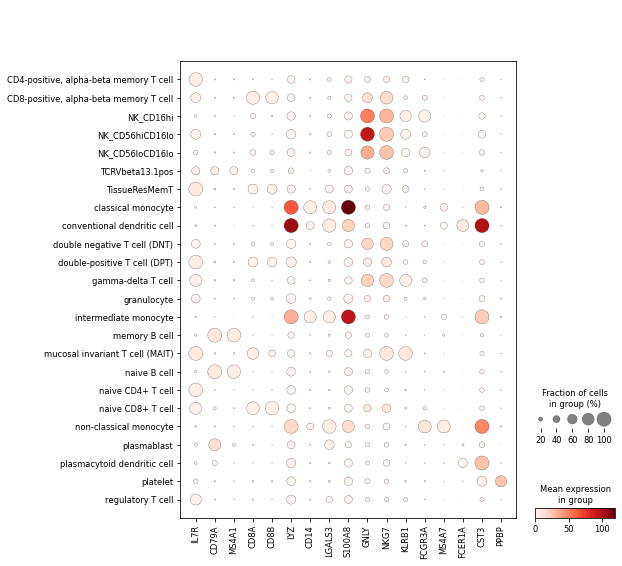

In [29]:
sc.pl.dotplot(COVID_I, marker_genes, groupby='cell_subtype')

In [68]:
print('load COVID Germany dataset')
COVID_G = sc.read_h5ad('/home/yike/phd/dengue/data/dataset_from_google/COVID PBMC Germany/filtered_cellXgene.h5ad')

load COVID Germany dataset


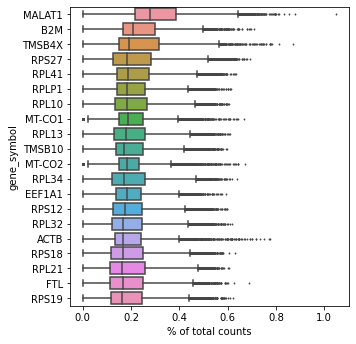

In [69]:
sc.pl.highest_expr_genes(COVID_G, n_top=20, )

In [70]:
sc.pp.filter_cells(COVID_G, min_genes=200)
sc.pp.filter_genes(COVID_G, min_cells=3)

In [71]:
COVID_G.var['mt'] = COVID_G.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(COVID_G, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

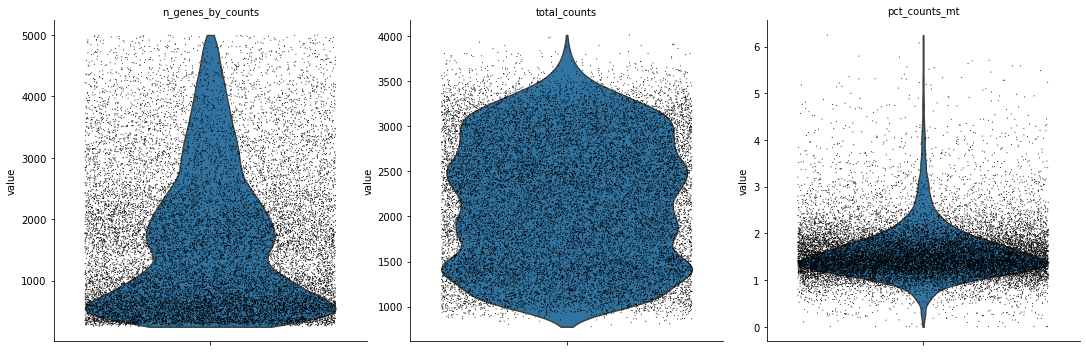

In [72]:
sc.pl.violin(COVID_G, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

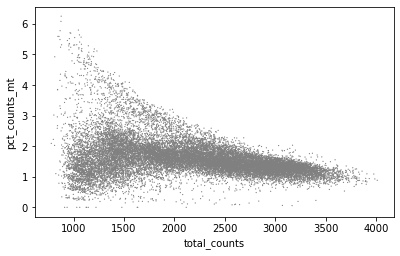

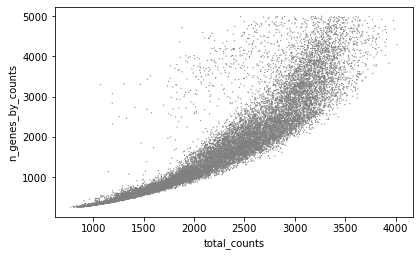

In [73]:
sc.pl.scatter(COVID_G, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(COVID_G, x='total_counts', y='n_genes_by_counts')

In [74]:
COVID_G = COVID_G[COVID_G.obs.n_genes_by_counts < 5000, :]
COVID_G = COVID_G[COVID_G.obs.pct_counts_mt < 3, :]

In [75]:
sc.pp.normalize_total(COVID_G, target_sum=1e6)
sc.pp.log1p(COVID_G)

/home/yike/.local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [80]:
sc.pp.highly_variable_genes(COVID_G, min_mean=0.0125, max_mean=6, min_disp=0.5)

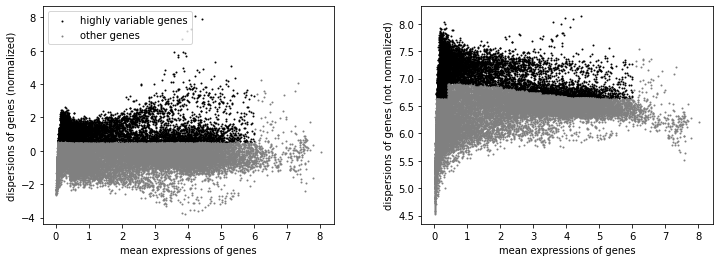

In [81]:
sc.pl.highly_variable_genes(COVID_G)

... storing 'cell_type' as categorical


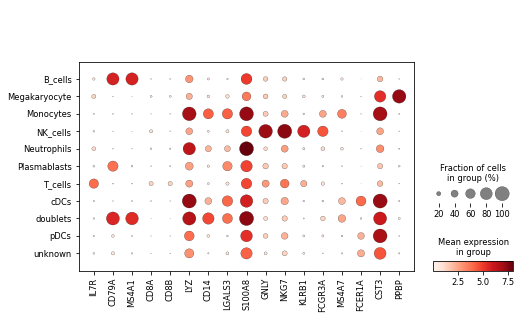

In [96]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

sc.pl.dotplot(COVID_G, marker_genes, groupby='cell_type')